In [3]:
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.transform import resize



In [5]:
# Load image (assuming 'image22.jpeg' is available or replace with a sample)
# If image is not found, you might need to upload it or use a sample image.
try:
    I_color = imread('image Alpha.jpg')
except FileNotFoundError:
    print("image Alpha.jpeg not found. Using a sample image instead.")
    # Create a dummy image for demonstration if file not found
 

In [6]:
import numpy as np
I_color = np.random.randint(0, 255, size=(100, 100, 3), dtype=np.uint8)



In [7]:
# Convert to grayscale
I = rgb2gray(I_color)



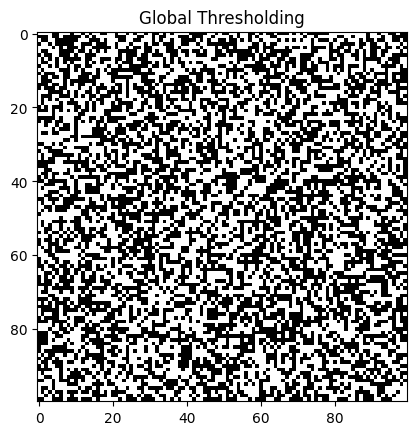

In [8]:
# Otsu's method for global thresholding
T = threshold_otsu(I)
BW_global = I > T

plt.figure()
plt.imshow(BW_global, cmap='gray')
plt.title('Global Thresholding')
plt.show()

In [9]:
from skimage.filters import threshold_local
import matplotlib.pyplot as plt



In [10]:
# 'NeighborhoodSize', [51 51] suggests a block size of 51 for local thresholding
block_size = 51



In [11]:
# The 0.4 in adaptthresh could be an offset for threshold_local
local_threshold = threshold_local(I, block_size, offset=0.4)



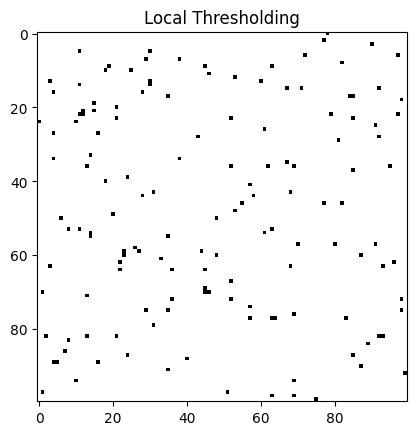

In [12]:
# Binarize the image using the calculated local threshold
BW_local = I > local_threshold

plt.figure()
plt.imshow(BW_local, cmap='gray')
plt.title('Local Thresholding')
plt.show()

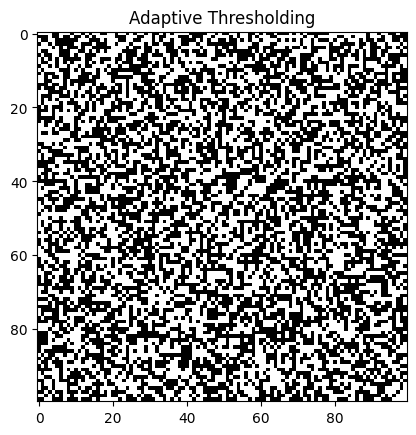

In [13]:
from skimage.filters import threshold_local
import matplotlib.pyplot as plt

# For adaptive thresholding, we can use threshold_local with a block_size
# The exact parameters for 'adaptive' in imbinarize often refer to local adaptive methods
# Let's use a block size similar to what was used for local thresholding or experiment.
# A default offset of 0 is often used for simple adaptive thresholding.
block_size_adaptive = 51 # Using a similar block size as for local thresholding
adaptive_threshold = threshold_local(I, block_size_adaptive, offset=0)
BW_adaptive = I > adaptive_threshold

plt.figure()
plt.imshow(BW_adaptive, cmap='gray')
plt.title('Adaptive Thresholding')
plt.show()

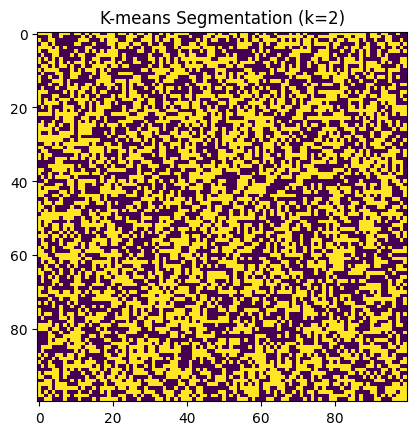

In [14]:
from sklearn.cluster import KMeans
from skimage.util import img_as_float
import matplotlib.pyplot as plt
import numpy as np

img = img_as_float(I) # Convert image to float (equivalent to im2double)
pixel = img.flatten() # Flatten the image to a 1D array

k = 2 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=0, n_init=10) # n_init for modern sklearn
kmeans.fit(pixel.reshape(-1, 1)) # KMeans expects 2D array
idx = kmeans.labels_ # Get cluster labels

seg2 = idx.reshape(img.shape) # Reshape labels back to original image dimensions

plt.figure()
plt.imshow(seg2, cmap='viridis') # Use a colormap to visualize segments
plt.title('K-means Segmentation (k=2)')
plt.show()

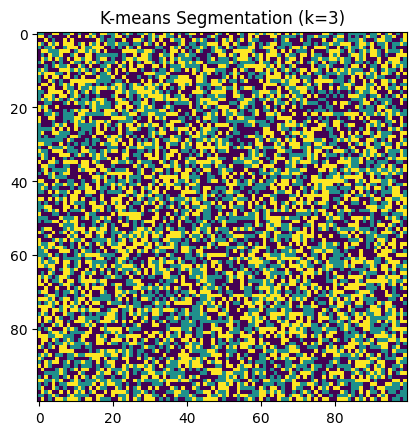

In [15]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

k = 3 # Number of clusters
kmeans_3 = KMeans(n_clusters=k, random_state=0, n_init=10) # Create a new KMeans instance for k=3
idx_3 = kmeans_3.fit_predict(pixel.reshape(-1, 1)) # Fit and predict labels

seg3 = idx_3.reshape(img.shape) # Reshape labels back to original image dimensions

plt.figure()
plt.imshow(seg3, cmap='viridis') # Use a colormap to visualize segments
plt.title('K-means Segmentation (k=3)')
plt.show()

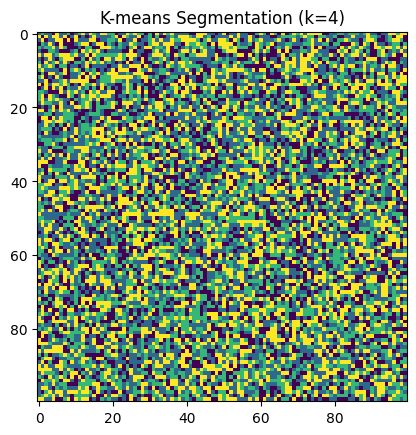

In [16]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

k = 4 # Number of clusters
kmeans_4 = KMeans(n_clusters=k, random_state=0, n_init=10) # Create a new KMeans instance for k=4
idx_4 = kmeans_4.fit_predict(pixel.reshape(-1, 1)) # Fit and predict labels

seg4 = idx_4.reshape(img.shape) # Reshape labels back to original image dimensions

plt.figure()
plt.imshow(seg4, cmap='viridis') # Use a colormap to visualize segments
plt.title('K-means Segmentation (k=4)')
plt.show()

image22.jpeg not found. Using a sample image instead.


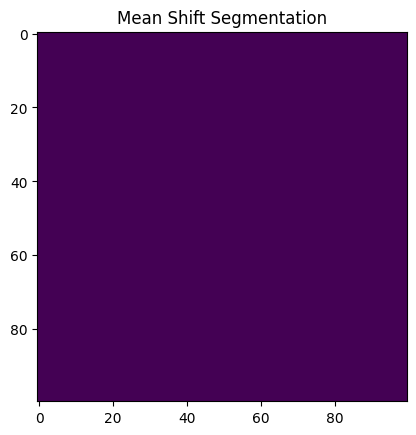

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

# Load image (using the color image as Mean Shift often benefits from it)
# If 'image22.jpeg' is not found, a dummy image will be used.
try:
    img_color = imread('image22.jpeg')
except FileNotFoundError:
    print("image22.jpeg not found. Using a sample image instead.")
    img_color = np.random.randint(0, 255, size=(100, 100, 3), dtype=np.uint8)

# Reshape the image to be a list of pixels (each pixel is a color vector)
# Normalize pixel values to a range (e.g., 0 to 1) for MeanShift
data = img_color.reshape((-1, 3)) / 255.0

# Estimate bandwidth for Mean Shift
# This is a critical parameter; adjusting quantile or n_samples might be necessary
# for different images or desired segmentation granularity.
bandwidth = estimate_bandwidth(data, quantile=0.2, n_samples=500, random_state=0)

# Perform Mean Shift clustering
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, n_jobs=-1)
ms.fit(data)
labels = ms.labels_
# cluster_centers = ms.cluster_centers_ # Can be used to reconstruct the segmented image with cluster colors

# Reshape the labels back to the original image shape (height, width)
seg_ms = labels.reshape(img_color.shape[:2])

# Display the segmented image
plt.figure()
plt.imshow(seg_ms, cmap='viridis') # Use a colormap to visualize segments
plt.title('Mean Shift Segmentation')
plt.show()